# K-Means

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_1548/2660915427.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Cargamos datos

In [3]:
url="https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"

data=pd.read_csv(url)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Revisamos duplicados y nulos.

Nos quedamos sólo con las columnas que nos indica el enunciado: Latitude, Longitude y MedInc

In [9]:
print(data.duplicated().sum())
print(data.isnull().sum())

data_clean=data[["Latitude","Longitude","MedInc"]].copy()
data_clean.info()

0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


Separamos en train y test

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test=train_test_split(data_clean,test_size=0.2,random_state=42)

X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   16512 non-null  float64
 1   Longitude  16512 non-null  float64
 2   MedInc     16512 non-null  float64
dtypes: float64(3)
memory usage: 516.0 KB
<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 20046 to 3665
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   4128 non-null   float64
 1   Longitude  4128 non-null   float64
 2   MedInc     4128 non-null   float64
dtypes: float64(3)
memory usage: 129.0 KB


Entrenamos un K-means:

In [32]:
from sklearn.cluster import KMeans

# Entrenar el modelo
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

cluster=model.labels_
X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


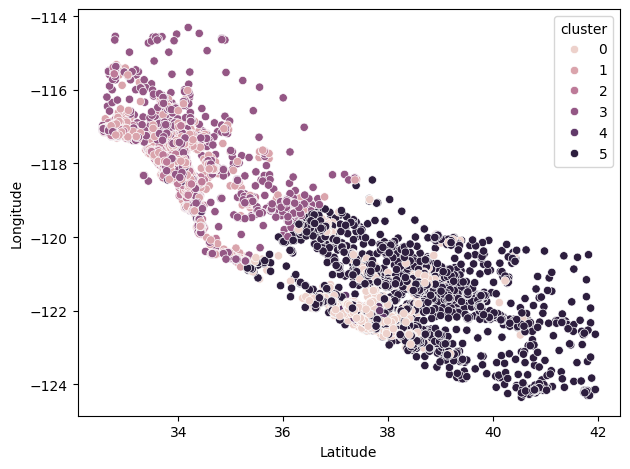

In [47]:
sns.scatterplot(data=X_train,x="Latitude",y="Longitude",hue="cluster")
plt.tight_layout()
plt.show()

In [39]:
X_train["cluster"]=cluster
X_train["group"]="Train"

In [40]:
pred=model.predict(X_test)
X_test["cluster"]=pred
X_test["group"]="Test"

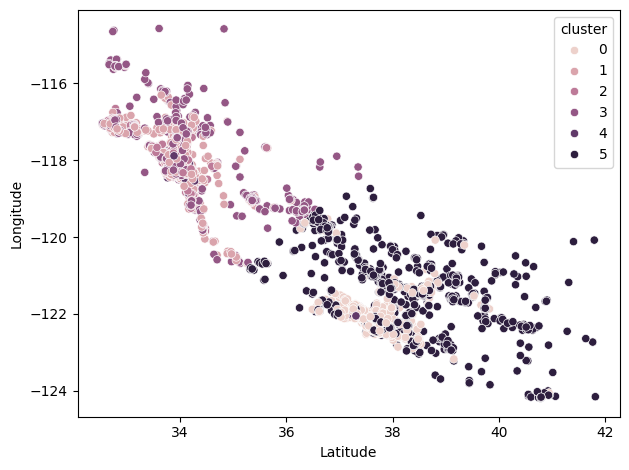

In [48]:
sns.scatterplot(data=X_test,x="Latitude",y="Longitude",hue="cluster")
plt.tight_layout()
plt.show()

In [41]:
data_cluster=pd.concat([X_train,X_test],axis=0)
data_cluster.head()

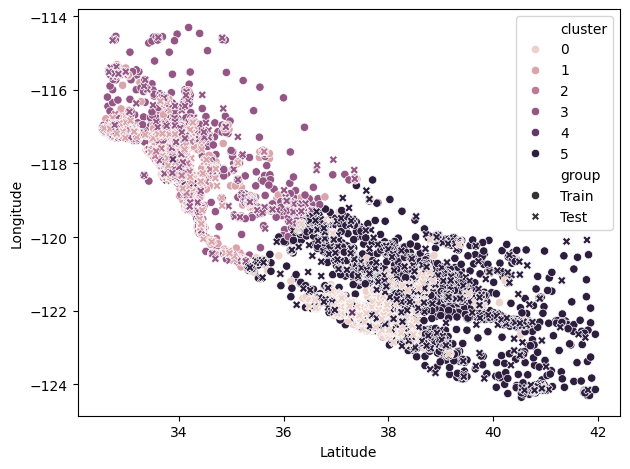

In [46]:
sns.scatterplot(data=data_cluster,x="Latitude",y="Longitude",hue="cluster",style="group")
plt.tight_layout()
plt.show()